# Iris dataset
Normalize some flowers.

https://en.wikipedia.org/wiki/Iris_flower_data_set

In [1]:
%autosave 0

from numpy import cov
from numpy.linalg import eigh
from seaborn import pairplot
from sklearn.decomposition import PCA

from tools import *

Autosave disabled


## get data from `sklearn.datasets`

In [2]:
data = irisdata()
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


## separate features from target columns

In [4]:
clues = data[data.columns.drop('species')]
afew(clues)

,sepal_length,sepal_width,petal_length,petal_width
87,6.3,2.3,4.4,1.3
142,5.8,2.7,5.1,1.9
77,6.7,3.0,5.0,1.7
39,5.1,3.4,1.5,0.2
6,4.6,3.4,1.4,0.3


In [5]:
answers = data['species']
afew(answers)

96    versicolor
22        setosa
44        setosa
41        setosa
0         setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

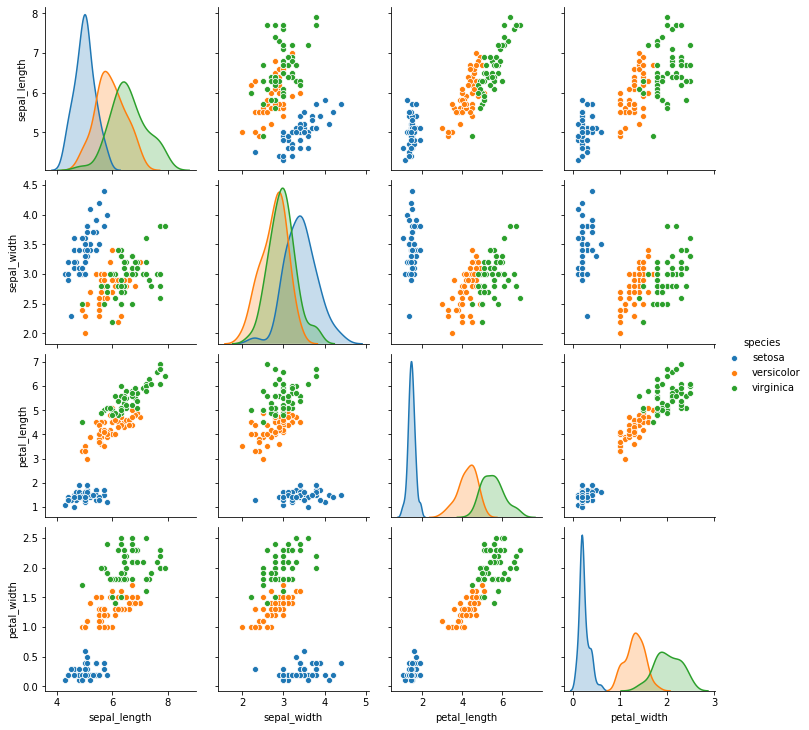

In [6]:
def showpairs(clues, answers):
    pairplot(clues.join(answers), hue=answers.name)
    
showpairs(clues, answers)

## standardize data (Z-scores)

In [7]:
zclues = zscores(clues)
zclues.mean()

sepal_length   -1.451617e-15
sepal_width    -1.652752e-15
petal_length   -1.589839e-15
petal_width    -5.491903e-16
dtype: float64

In [8]:
zclues.std()

sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64

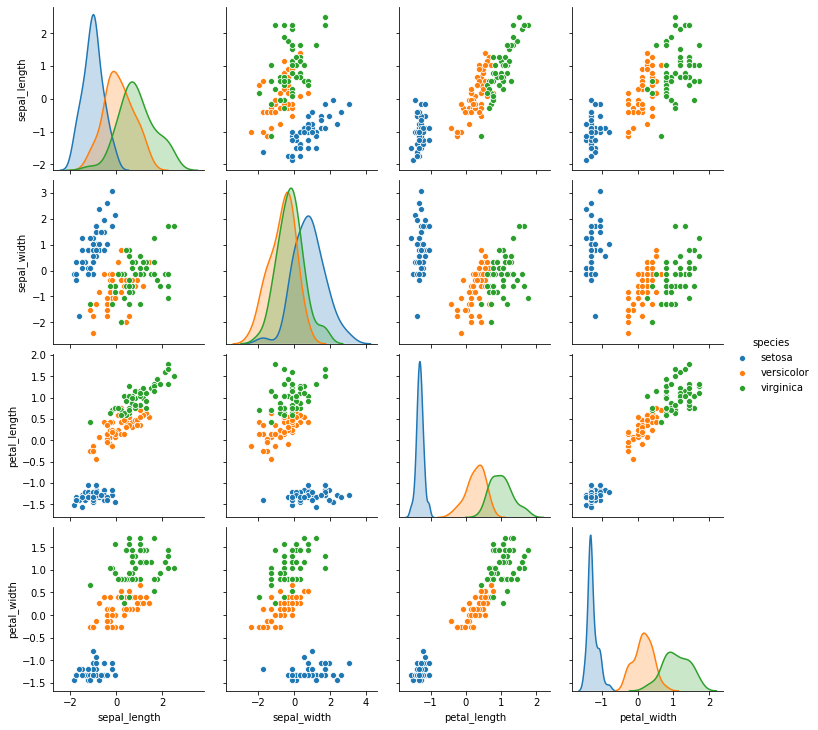

In [9]:
showpairs(zclues, answers)

## standardize data (median-based)

In [10]:
mclues = zscores(clues, robust=True)
mclues.median()

sepal_length    0.000000e+00
sepal_width     0.000000e+00
petal_length    2.844947e-16
petal_width     0.000000e+00
dtype: float64

In [11]:
mclues.mad()

sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64

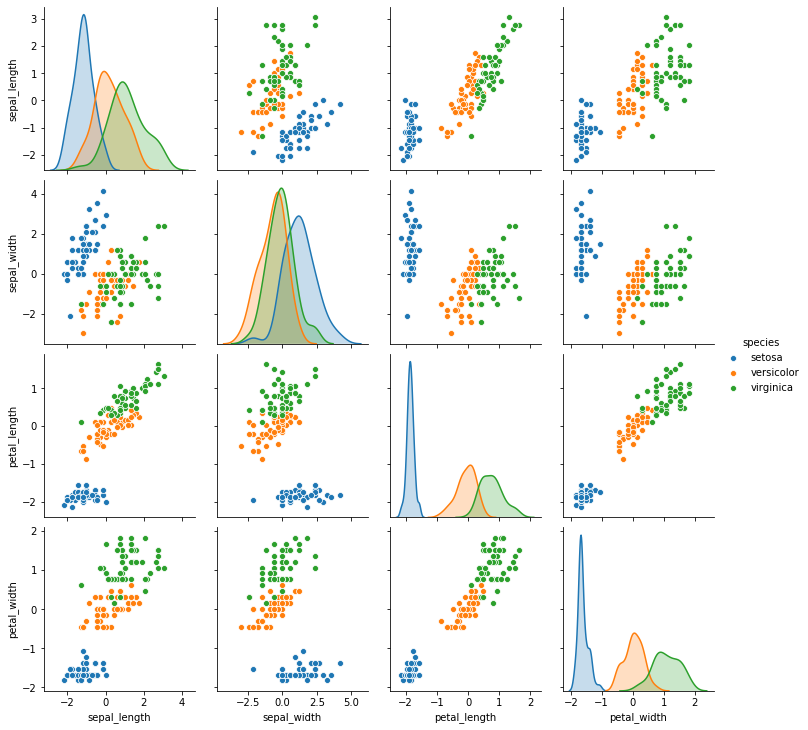

In [12]:
showpairs(mclues, answers)

## principal components

Use a few new coordinates to approximate a large number of columns.
In this toy example, "a few" means 2 and the "large" number is 4.

https://en.wikipedia.org/wiki/Principal_component_analysis

CPU times: user 1.05 ms, sys: 855 µs, total: 1.9 ms
Wall time: 1.76 ms


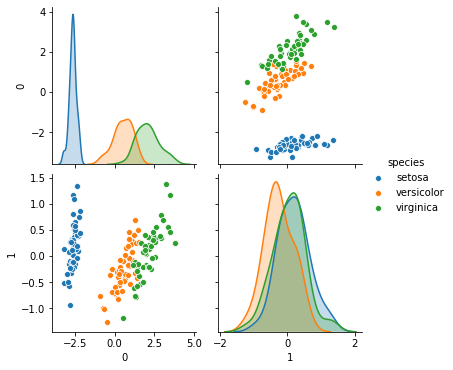

In [13]:
%time pdata = PCA(2).fit_transform(clues)

showpairs(DataFrame(pdata), answers)

## DIY principal components

`sklearn.decomposition.PCA` uses singular value decomposition tricks to save RAM. This method does not, but it's fast enough for smaller datasets.

https://en.wikipedia.org/wiki/Principal_axis_theorem

CPU times: user 1.45 ms, sys: 75 µs, total: 1.53 ms
Wall time: 1.44 ms
CPU times: user 0 ns, sys: 644 µs, total: 644 µs
Wall time: 688 µs


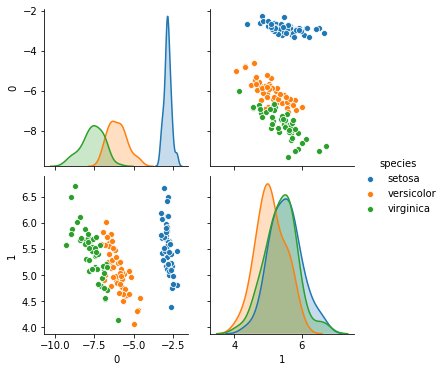

In [14]:
# Find eigenvectors of sample covariance.
%time _, evecs = eigh(cov(clues.T))

# Choose *last* 2 eigenvectors.
%time diy = clues @ evecs[:, -1:-3:-1]

showpairs(DataFrame(diy), answers)